In [135]:
import pandas as pd

In [136]:

columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"]

data = pd.read_csv("../data/imports-85.data", names=columns, na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data found! removing rows with missing data!

In [137]:
dataDropped = data.dropna().reset_index()
dataDropped.info()

print(dataDropped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              159 non-null    int64  
 1   symboling          159 non-null    int64  
 2   normalized-losses  159 non-null    float64
 3   make               159 non-null    object 
 4   fuel-type          159 non-null    object 
 5   aspiration         159 non-null    object 
 6   num-of-doors       159 non-null    object 
 7   body-style         159 non-null    object 
 8   drive-wheels       159 non-null    object 
 9   engine-location    159 non-null    object 
 10  wheel-base         159 non-null    float64
 11  length             159 non-null    float64
 12  width              159 non-null    float64
 13  height             159 non-null    float64
 14  curb-weight        159 non-null    int64  
 15  engine-type        159 non-null    object 
 16  num-of-cylinders   159 non

For whatever reason, some numbers were written as words! converting to int...

In [138]:
%pip install word2number
from word2number import w2n

strangeColumns = ["num-of-doors", "num-of-cylinders"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = dataDropped[strangeColumns]
standardData = dataDropped[standardColumns]

strangeData = strangeData.map(lambda a : w2n.word_to_num(str(a)))

data = pd.concat([standardData, strangeData], axis=1)
data.info()
print(data)

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stroke             159 non-null    float64
 1   horsepower         159 non-null    float64
 2   bore               159 non-null    float64
 3   normalized-losses  159 non-null    float64
 4   height             159 non-null    float64
 5   curb-weight        159 non-null    int64  
 6   width              159 non-null    float64
 7   engine-size        159 non-null    int64  
 8   symboling          159 non-null    int64  
 9   drive-wheels       159 non-null    object 
 10  engine-location    159 non-null    object 
 11  highway-mpg        159 non-null    int64  
 12  compression-ratio  159 non-null    float64
 13  fuel-system        159 non-null    object 
 14  body-style         159 non-null    object 
 15  city-mpg


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Strings found! Using one-hot encoding to change data to numeric

In [139]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

strangeColumns = ["engine-location", "body-style", "drive-wheels", "engine-type", "fuel-type", "make", "fuel-system", "aspiration"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = pd.DataFrame()
standardData = data[standardColumns]

for column in strangeColumns:
    local_cat = data[[column]]  
    local_cat.sample(10)

    encoder = OneHotEncoder()
    local_cat = encoder.fit_transform(local_cat).toarray()
    local_data = pd.DataFrame(local_cat, columns=encoder.get_feature_names_out([column]))
    strangeData = pd.concat([strangeData, local_data], axis=1)
    print(local_data)
dataCleaned = pd.concat([strangeData, standardData], axis=1)
print("#" * 100)
print(data)
#data.info()

     engine-location_front
0                      1.0
1                      1.0
2                      1.0
3                      1.0
4                      1.0
..                     ...
154                    1.0
155                    1.0
156                    1.0
157                    1.0
158                    1.0

[159 rows x 1 columns]
     body-style_convertible  body-style_hardtop  body-style_hatchback  \
0                       0.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
..                      ...                 ...                   ...   
154                     0.0                 0.0                   0.0   
155                     0.0                 0.0                   0.

Unscaled values found! Using Standard scaler to scale

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

newColumns = list(dataCleaned.columns.values)

target = ["price", "peak-rpm", "horsepower"]
X = dataCleaned[list(set(newColumns) - set(target))]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train_set_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(train_set_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,make_jaguar,stroke,engine-type_l,fuel-type_gas,fuel-system_spdi,normalized-losses,height,make_dodge,engine-type_dohc,engine-location_front,...,make_nissan,wheel-base,fuel-type_diesel,num-of-doors,make_saab,length,drive-wheels_rwd,aspiration_std,engine-type_ohcv,fuel-system_1bbl
0,0.0,0.977450,4.769696,-3.297726,-0.180579,1.210083,1.200852,-0.209657,-0.103142,0.0,...,-0.380235,1.875591,3.297726,0.816497,-0.209657,1.297051,1.719981,-2.511512,-0.235702,-0.303239
1,0.0,0.782234,-0.209657,0.303239,-0.180579,0.979879,-1.945317,-0.209657,-0.103142,0.0,...,-0.380235,-0.322071,-0.303239,-1.224745,-0.209657,0.097000,-0.581402,0.398167,-0.235702,-0.303239
2,0.0,-0.616814,-0.209657,0.303239,-0.180579,-1.293380,0.252692,-0.209657,-0.103142,0.0,...,-0.380235,-0.435743,-0.303239,0.816497,-0.209657,-1.155609,-0.581402,0.398167,-0.235702,-0.303239
3,0.0,1.042522,-0.209657,0.303239,-0.180579,-1.552359,-0.005898,-0.209657,-0.103142,0.0,...,-0.380235,0.833596,-0.303239,0.816497,-0.209657,0.324747,-0.581402,0.398167,-0.235702,-0.303239
4,0.0,1.367882,-0.209657,-3.297726,-0.180579,-0.746647,1.028459,-0.209657,-0.103142,0.0,...,-0.380235,3.334384,3.297726,0.816497,-0.209657,2.689812,1.719981,-2.511512,-0.235702,-0.303239


from sklearn.linear_model import *

model = Ridge(0.018)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.coef_)

print(model.predict(X_test) - y_test)

In [141]:
from sklearn.linear_model import *

alphaList = [0.01 / (5 ** i) for i in range(10)]
modelList = [
    ["Ridge---------------", lambda a : Ridge(alpha=a, max_iter=50000)],
    ["Lasso---------------", lambda a : Lasso(alpha=a, max_iter=50000)],
    ["Elastic Net .8 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.8)],
    ["Elastic Net .6 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.6)],
    ["Elastic Net .4 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.4)],
    ["Elastic Net .2 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.2)]
]
print(alphaList)

[0.01, 0.002, 0.0004, 8e-05, 1.6e-05, 3.2e-06, 6.4e-07, 1.28e-07, 2.56e-08, 5.1200000000000005e-09]


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 0.01
   train:    201408.7176556807	   val:      2124836.167172432
   error:    1923427.4495167513	   accuracy: 0.5642087597560034
  alpha 0.002
   train:    200930.94462698084	   val:      2141278.5078549595
   error:    1940347.5632279785	   accuracy: 0.5405366819485518
  alpha 0.0004
   train:    200908.27167583813	   val:      2146014.9301664294
   error:    1945106.6584905912	   accuracy: 0.5350309397517617
  alpha 8e-05
   train:    200907.32993205052	   val:      2147035.6543926853
   error:    1946128.3244606347	   accuracy: 0.5338929798438374
  alpha 1.6e-05
   train:    200907.29197115742	   val:      2147242.8909497266
   error:    1946335.5989785693	   accuracy: 0.5336638578407805
  alpha 3.2e-06
   train:    200907.29045037215	   val:      2147284.4630801165
   error:    1946377.1726297443	   accuracy: 0.533617971825247
  alpha 6.4e-07
   train: 

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.01
   train:    200908.3268307315	   val:      2316240.478518683
   error:    2115332.1516879513	   accuracy: 0.51262594005905


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002
   train:    200907.33789524206	   val:      2002526.8847152304
   error:    1801619.5468199884	   accuracy: 0.5193138344119307


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0004
   train:    200907.29251792366	   val:      1883849.5336660917
   error:    1682942.241148168	   accuracy: 0.518081445760621


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 8e-05
   train:    200907.2904727497	   val:      1865414.3482668165
   error:    1664507.0577940668	   accuracy: 0.5263389465283024


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    200907.2903902348	   val:      1865575.812893913
   error:    1664668.5225036782	   accuracy: 0.5274196345603288


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    200907.29038710706	   val:      1865860.2672767576
   error:    1664952.9768896506	   accuracy: 0.5218628752139897


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    200907.29038699061	   val:      1865929.9467877075
   error:    1665022.6564007169	   accuracy: 0.517478885487212


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    200907.29038698607	   val:      1865944.654438465
   error:    1665037.364051479	   accuracy: 0.5162569123222768


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    200907.2903869856	   val:      1865947.622539994
   error:    1665040.3321530086	   accuracy: 0.5160022508092038


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    200907.29038698607	   val:      1865948.2172237318
   error:    1665040.9268367458	   accuracy: 0.5159509078438242

Best alpha: 1.6e-05
Generalization error: 1664668.5225036782
Coefficient: [[ 0.00000000e+00  1.64600285e+03  1.63336022e+03 -6.72987787e+03
  -1.08553564e+03  2.16832747e+00 -4.32822537e+02 -1.50773536e+03
   1.34831119e+03  0.00000000e+00  8.04428776e+03 -1.08013998e+03
  -5.41111503e+02 -2.38316202e+03  3.00684686e+03 -1.17184603e+02
   1.12055047e+04 -1.91020670e+03  9.67847135e+02 -1.95256670e+03
   1.13125241e+04 -3.72941717e+03  2.99172878e+03  6.13204683e+03
  -7.96385831e+02 -5.38407186e+03 -8.37340285e+01 -2.20559417e+02
  -8.51386085e+02 -2.90081976e+03  1.04882381e+01 -4.89369434e+03
  -4.82819194e+02 -1.98552563e+03  1.32745699e+03  8.98904530e+02
   1.83145351e+02 -7.19976700e+01  1.17155571e+02  1.64941836e+02
   1.53231693e+03 -6.30290346e+02  0.00000000e+00 -2.87190852e+03
  -6.89885906e+02  2.04808836e+03  6.386

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.873e+05, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 8e-05
   train:    200921.1368203077	   val:      2142749.242993416
   error:    1941828.106173108	   accuracy: 0.5387857182353112


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.766e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    200907.78328797175	   val:      2226691.116212332
   error:    2025783.3329243604	   accuracy: 0.5195023750750254


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    200907.3271537771	   val:      2038378.7232363801
   error:    1837471.3960826031	   accuracy: 0.5245493817068178


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    200907.2930226368	   val:      1873620.8255165687
   error:    1672713.532493932	   accuracy: 0.5291299884481314


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    200907.2905091271	   val:      1864598.683089114
   error:    1663691.392579987	   accuracy: 0.519651485875749


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    200907.2903920239	   val:      1865537.6386372603
   error:    1664630.3482452363	   accuracy: 0.5167320993162703


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    200907.29038718846	   val:      1865860.3584872056
   error:    1664953.068100017	   accuracy: 0.5160989927237338

Best alpha: 0.01
Generalization error: 1925952.112156262
Coefficient: [[ 0.00000000e+00  1.29904061e+02 -1.54927702e+03 -7.31883961e+02
  -5.60342839e+02  5.13512214e+00 -3.17644176e+02 -2.12854109e+03
   2.74795133e+03  0.00000000e+00  4.71297723e+03 -3.06075339e+02
  -1.03345830e+03 -3.20095206e+03  1.80198281e+02 -1.44072231e+02
   5.80944641e+03 -3.54651538e+02 -7.11318202e+02  8.69789164e+02
   7.31883040e+02 -5.41132165e+02  2.53014506e+03  3.12813470e+03
  -7.04986117e+02 -1.54927717e+03  2.29697247e+02 -1.37542893e+03
  -7.28271991e+02 -6.54018413e+02  9.61270314e+00  3.44290068e+02
  -5.97772163e+02 -2.54303478e+03 -2.72172102e+02 -8.91100371e+02
   4.21946577e+02 -6.59068683e+01  2.11758118e+02  1.42813253e+02
  -3.54653091e+02 -4.87112558e+02  0.00000000e+00  1.32410107e+02
  -1.25063387e+02  2.80051793e+03 -7.16426712

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.771e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    200909.5174484437	   val:      2149935.775509721
   error:    1949026.2580612774	   accuracy: 0.5351080658310853


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    200907.38904400423	   val:      2192773.9316193312
   error:    1991866.542575327	   accuracy: 0.5111420135002854


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    200907.299276102	   val:      1905601.0393983459
   error:    1704693.7401222438	   accuracy: 0.5323644033162008


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    200907.29085702755	   val:      1864878.8290824834
   error:    1663971.538225456	   accuracy: 0.5225049950383134


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    200907.29040696475	   val:      1865199.6013774397
   error:    1664292.310970475	   accuracy: 0.5174381239769603


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    200907.29038779563	   val:      1865775.436086572
   error:    1664868.1456987765	   accuracy: 0.5162461061365399

Best alpha: 0.01
Generalization error: 1916070.9395010436
Coefficient: [[ 0.00000000e+00 -3.02388504e+02 -1.47736860e+03 -3.16689781e+02
  -4.90962311e+02  5.21088426e+00 -2.88271314e+02 -1.68272327e+03
   2.44896863e+03  0.00000000e+00  4.01593005e+03 -1.85796803e+02
  -6.29046515e+02 -2.81017356e+03 -1.22545744e+02 -1.32937941e+02
   4.47026027e+03 -3.40902311e+02 -5.32942031e+02  1.20136274e+03
   3.16691518e+02 -4.74529980e+02  2.23996195e+03  2.72629952e+03
  -6.19823222e+02 -1.47736795e+03  2.76193006e+02 -1.12595237e+03
  -6.90013367e+02 -1.21925226e+02  9.49843662e+00  4.06489125e+02
  -5.74925816e+02 -2.03777104e+03 -5.32482436e+01 -7.92369176e+02
   5.06891517e+02 -6.21662328e+01  2.40354338e+02  1.18765998e+02
  -3.40900627e+02 -3.50702583e+02  0.00000000e+00  3.79944291e+01
  -4.71794828e+01  2.87816934e+03 -5.4454052

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.775e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    200912.3653222441	   val:      2143096.629810329
   error:    1942184.264488085	   accuracy: 0.5370809029275568


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.765e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    200907.4792793833	   val:      2246283.0723818406
   error:    2045375.5931024572	   accuracy: 0.5095788782697303


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    200907.30753242868	   val:      1948300.5483123173
   error:    1747393.2407798886	   accuracy: 0.5313597112652485


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    200907.2914057337	   val:      1866586.695060943
   error:    1665679.4036552093	   accuracy: 0.5248774973157863


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    200907.290431581	   val:      1864931.71552402
   error:    1664024.425092439	   accuracy: 0.5181208764617573


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 5.1200000000000005e-09
   train:    200907.29038880276	   val:      1865693.4353017043
   error:    1664786.1449129016	   accuracy: 0.516392252611657

Best alpha: 0.01
Generalization error: 1897111.9657427508
Coefficient: [[ 0.00000000e+00 -4.94976107e+02 -1.43113679e+03 -1.58180489e+02
  -4.66112587e+02  5.00637151e+00 -2.72589182e+02 -1.42627854e+03
   2.19087579e+03  0.00000000e+00  3.58210778e+03 -1.35218143e+02
  -4.28897751e+02 -2.58176131e+03 -2.52236731e+02 -1.20406662e+02
   3.68486580e+03 -3.19657623e+02 -4.15084185e+02  1.35030561e+03
   1.58180876e+02 -4.31295980e+02  2.01263064e+03  2.50588984e+03
  -5.54787931e+02 -1.43113663e+03  2.91167952e+02 -9.75589604e+02
  -6.70293920e+02  6.03172950e+01  9.49682043e+00  4.18841762e+02
  -5.42542900e+02 -1.73893132e+03  4.33589894e+01 -7.42465484e+02
   5.52193256e+02 -5.85691407e+01  2.59691797e+02  9.93642352e+01
  -3.19657276e+02 -2.43006561e+02  0.00000000e+00 -2.84544853e+01
  -2.72632984e+01  2.83155019e+03 -4.4985973

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.776e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.6e-05
   train:    200916.19526637567	   val:      2143468.1465447885
   error:    1942551.9512784127	   accuracy: 0.5378785990315934


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.766e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 3.2e-06
   train:    200907.60787325216	   val:      2246650.965235716
   error:    2045743.357362464	   accuracy: 0.5137948397621851


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 6.4e-07
   train:    200907.31694150154	   val:      1993917.5772919136
   error:    1793010.260350412	   accuracy: 0.5283576039753216


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 1.28e-07
   train:    200907.2921329432	   val:      1869543.5082810887
   error:    1668636.2161481455	   accuracy: 0.5268245935860821


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

  alpha 2.56e-08
   train:    200907.29046564907	   val:      1864732.2225863198
   error:    1663824.9321206708	   accuracy: 0.5187808969793437


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+07, tolerance: 3.483e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 1.845e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 5.1200000000000005e-09
   train:    200907.29039021055	   val:      1865614.3414692068
   error:    1664707.0510789964	   accuracy: 0.5165374366588277

Best alpha: 0.01
Generalization error: 1878977.2956517118
Coefficient: [[ 0.00000000e+00 -5.98409729e+02 -1.39204692e+03 -7.82929093e+01
  -4.51739188e+02  4.75728066e+00 -2.61997621e+02 -1.24875335e+03
   1.97835316e+03  0.00000000e+00  3.27096094e+03 -1.06811223e+02
  -3.09012937e+02 -2.41806849e+03 -3.15336930e+02 -1.08528885e+02
   3.15386949e+03 -3.01246788e+02 -3.34707588e+02  1.42616969e+03
   7.82930196e+01 -3.99854210e+02  1.82842429e+03  2.35020763e+03
  -5.03815851e+02 -1.39204687e+03  2.97281538e+02 -8.68738702e+02
  -6.57414569e+02  1.25598696e+02  9.52103366e+00  4.16403890e+02
  -5.10090441e+02 -1.52918623e+03  9.66185068e+01 -7.12166611e+02
   5.79535977e+02 -5.52590156e+01  2.74176904e+02  8.30823542e+01
  -3.01246692e+02 -1.56353620e+02  0.00000000e+00 -7.42360399e+01
  -2.07043081e+01  2.75485419e+03 -3.856390

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.478e+02, tolerance: 7.570e+00
  model = cd_fast.enet_coordinate_descent(


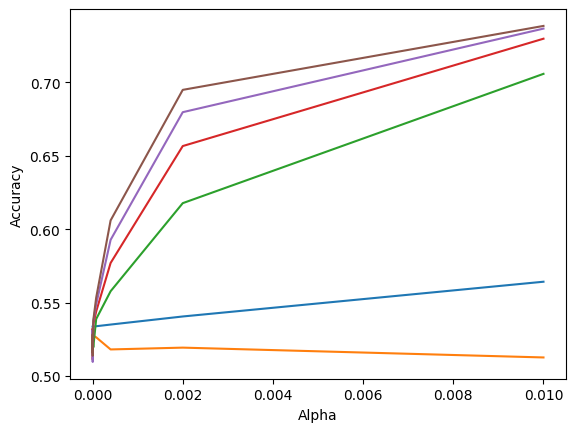

In [142]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train():
    bestest_model = [0, None, "None"]
    for modelStruct in modelList:
        xPoint = []
        yPoint = []
        name, modelCall = modelStruct
        print(f"{name}{"-" * 100}")
        lowestVal = [1000, 0, None, 0, 0, 0]
        for alpha in alphaList:
            model = modelCall(alpha)
            model.fit(X_train, y_train)
    
            #get MSEs
            train_pred = model.predict(X_train)
            train_mse  = mean_squared_error(y_train, train_pred)
            val_pred   = model.predict(X_val)
            val_mse    = mean_squared_error(y_val, val_pred)
            error      = abs(train_mse - val_mse)
            acc        = model.score(X_val, y_val)
            #I PONDERED IF ACCURACY IS PAC OR MODE.SCORE(), IN THE END I USED MODEL.SCORE()
    
            print(f"  alpha {alpha}\n   train:    {train_mse}\t   val:      {val_mse}\n   error:    {error}\t   accuracy: {acc}")
            if (lowestVal[5] < acc):
                lowestVal = [error, alpha, model, train_mse, val_mse, acc]
                if (bestest_model[0] < acc):
                    bestest_model = [acc, model, name]
            xPoint.append(alpha)
            yPoint.append(acc)
        plt.plot(xPoint, yPoint)
        best_model = lowestVal[2]
        #print requirements
        print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    print(f"Best model: {bestest_model[2]}")
    best_model = bestest_model[1]
    print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy")
    plt.show()
    return best_model
best_model = train()

In [143]:
numList = [[newColumns[i], abs(best_model.coef_[2][i])] for i in range(len(best_model.coef_[2]))]
sortList = sorted(numList, key=lambda num: num[1], reverse=True) 
top8 = [sortList[i][0] for i in range(8)]
print(top8)

['make_toyota', 'highway-mpg', 'engine-type_l', 'body-style_hardtop', 'make_nissan', 'drive-wheels_rwd', 'bore', 'compression-ratio']


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 0.01
   train:    3173403.0120611736	   val:      3629434.050834365
   error:    456031.0387731916	   accuracy: 0.5123874053205156
  alpha 0.002
   train:    3173394.9604413346	   val:      3634212.896791134
   error:    460817.9363497994	   accuracy: 0.5122178077689464
  alpha 0.0004
   train:    3173394.6357214	   val:      3635178.6827631886
   error:    461784.0470417887	   accuracy: 0.5121832561733669
  alpha 8e-05
   train:    3173394.6227111886	   val:      3635372.2441429384
   error:    461977.6214317498	   accuracy: 0.5121763203340258
  alpha 1.6e-05
   train:    3173394.622190611	   val:      3635410.97261464
   error:    462016.35042402893	   accuracy: 0.5121749321434385
  alpha 3.2e-06
   train:    3173394.622169785	   val:      3635418.718957035
   error:    462024.09678724967	   accuracy: 0.5121746544643974
  alpha 6.4e-07
   train:    3173394.

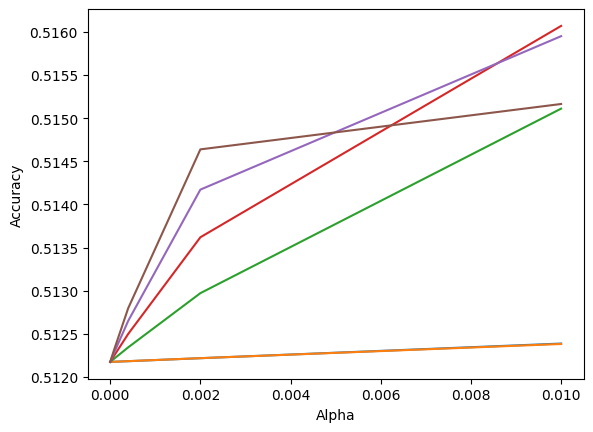

ElasticNet(alpha=0.01, l1_ratio=0.6, max_iter=50000)

In [144]:
X = dataCleaned[top8]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train()